In [ ]:
# 모델 비교 및 최종 선택

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결과 데이터 로드
with open('processed_data/results_logistic.pkl', 'rb') as f:
    results_logistic = pickle.load(f)

with open('processed_data/results_rf.pkl', 'rb') as f:
    results_rf = pickle.load(f)

with open('processed_data/results_xgb.pkl', 'rb') as f:
    results_xgb = pickle.load(f)

# 각 모델의 결과 정리
results_df = pd.DataFrame([
    {
        'Model': results_logistic['model_name'],
        'Accuracy': results_logistic['test_accuracy'],
        'Precision': results_logistic['test_precision'],
        'Recall': results_logistic['test_recall'],
        'F1-score': results_logistic['test_f1']
    },
    {
        'Model': results_rf['model_name'],
        'Accuracy': results_rf['test_accuracy'],
        'Precision': results_rf['test_precision'],
        'Recall': results_rf['test_recall'],
        'F1-score': results_rf['test_f1']
    },
    {
        'Model': results_xgb['model_name'],
        'Accuracy': results_xgb['test_accuracy'],
        'Precision': results_xgb['test_precision'],
        'Recall': results_xgb['test_recall'],
        'F1-score': results_xgb['test_f1']
    }
])

print("\n모델 성능 비교:")
print(results_df.to_string(index=False))


모델 성능 비교:
              Model  Accuracy  Precision   Recall  F1-score
Logistic Regression  0.843949   0.111111 0.190476  0.140351
      Random Forest  0.863057   0.260870 0.571429  0.358209
            XGBoost  0.847134   0.186047 0.380952  0.250000


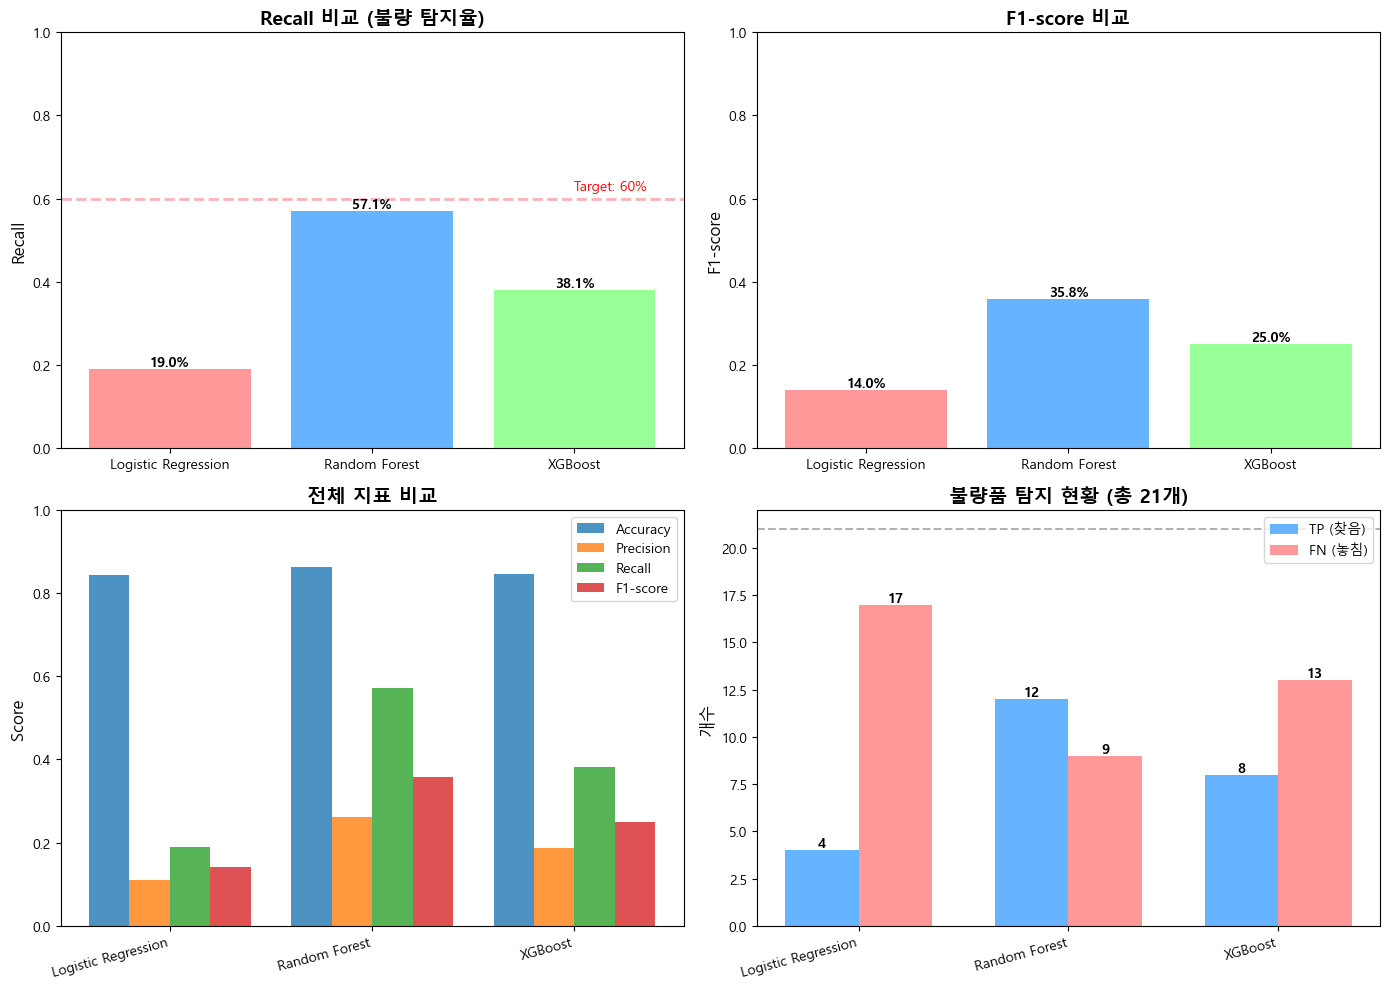

In [ ]:
# 2. 시각화

# 그래프 설정
plt.rc('font', family='Malgun Gothic')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Recall 비교 (가장 중요)
ax1 = axes[0, 0]
bars1 = ax1.bar(results_df['Model'], results_df['Recall'], color=['#ff9999', '#66b3ff', '#99ff99'])
ax1.set_ylabel('Recall', fontsize=12)
ax1.set_title('Recall 비교 (불량 탐지율)', fontsize=14, fontweight='bold')
ax1.axhline(y=0.6, color='r', linestyle='--', alpha=0.3, linewidth=2)
ax1.text(2, 0.62, 'Target: 60%', fontsize=10, color='red')
ax1.set_ylim([0, 1])
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height*100:.1f}%', ha='center', va='bottom', fontweight='bold')

# F1-score 비교
ax2 = axes[0, 1]
bars2 = ax2.bar(results_df['Model'], results_df['F1-score'], color=['#ff9999', '#66b3ff', '#99ff99'])
ax2.set_ylabel('F1-score', fontsize=12)
ax2.set_title('F1-score 비교', fontsize=14, fontweight='bold')
ax2.set_ylim([0, 1])
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height*100:.1f}%', ha='center', va='bottom', fontweight='bold')

# 모든 지표 비교
ax3 = axes[1, 0]
x = np.arange(len(results_df))
width = 0.2
ax3.bar(x - width*1.5, results_df['Accuracy'], width, label='Accuracy', alpha=0.8)
ax3.bar(x - width/2, results_df['Precision'], width, label='Precision', alpha=0.8)
ax3.bar(x + width/2, results_df['Recall'], width, label='Recall', alpha=0.8)
ax3.bar(x + width*1.5, results_df['F1-score'], width, label='F1-score', alpha=0.8)
ax3.set_ylabel('Score', fontsize=12)
ax3.set_title('전체 지표 비교', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(results_df['Model'], rotation=15, ha='right')
ax3.legend()
ax3.set_ylim([0, 1])

# Confusion Matrix 비교 (TP, FN)
ax4 = axes[1, 1]
tp_values = [cm[1,1] for cm in [results_logistic['confusion_matrix'], 
                                 results_rf['confusion_matrix'], 
                                 results_xgb['confusion_matrix']]]
fn_values = [cm[1,0] for cm in [results_logistic['confusion_matrix'], 
                                 results_rf['confusion_matrix'], 
                                 results_xgb['confusion_matrix']]]

x = np.arange(len(results_df))
width = 0.35
bars_tp = ax4.bar(x - width/2, tp_values, width, label='TP (찾음)', color='#66b3ff')
bars_fn = ax4.bar(x + width/2, fn_values, width, label='FN (놓침)', color='#ff9999')

ax4.set_ylabel('개수', fontsize=12)
ax4.set_title('불량품 탐지 현황 (총 21개)', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(results_df['Model'], rotation=15, ha='right')
ax4.legend()
ax4.set_ylim([0, 22])
ax4.axhline(y=21, color='black', linestyle='--', alpha=0.3)

for bars in [bars_tp, bars_fn]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [3]:
# 3. 최종 모델 선택

best_model_idx = results_df['Recall'].idxmax()
best_model = results_df.loc[best_model_idx, 'Model']
best_recall = results_df.loc[best_model_idx, 'Recall']

print(f"최종 선택: {best_model}")
print(f"Test Recall: {best_recall*100:.2f}%")

최종 선택: Random Forest
Test Recall: 57.14%


# 최종 결론

## 선택된 모델: Random Forest

### 선택 기준
**Recall 최대화** (불량품 놓치지 않기)

### 성능
- **Test Recall**: 57.14%
- 불량 21개 중 12개 탐지
- 9개만 놓침

---

## 선택 이유

1. **가장 높은 Recall (57.14%)**
   - Logistic: 19.05%
   - XGBoost: 38.10%
   - Random Forest: 57.14% 

2. **과적합 없음**
   - Train/Test 차이 작음
   - 일반화 잘됨

3. **해석 가능성**
   - 특성 중요도 제공
   - 어떤 센서가 중요한지 설명 가능

4. **이 데이터셋에 적합**
   - 샘플 1,567개, 특성 594개
   - 병렬 학습이 순차 학습보다 유리

---

## 다른 모델 분석

### Logistic Regression
- Recall: 19.05% (너무 낮음)
- 선형 모델의 한계
- 상관관계 약함 (최고 0.156)

### XGBoost
- Recall: 38.10% (RF보다 낮음)
- 과적합 문제 (Train 99.92%, Test 84.71%)
- 샘플 수 대비 특성 많아 순차 학습 불리

---

## 비즈니스 임팩트

| | 불량품 출하 | 조기 차단 |
|---|------------|----------|
| **베이스라인 (Logistic)** | 17개 | 4개 |
| **최종 모델 (RF)** | 9개 | 12개 |
| **개선** | -8개 (47% 감소) | +8개 |

---

## 주요 성과

1. **시간 Feature 추가 효과**
   - 추가 전: Recall 38.10%
   - 추가 후: Recall 57.14%
   - 개선: +19.04%p

2. **다양한 모델 실험**
   - 3개 모델 비교
   - 체계적 분석
   - 근거 기반 선택

3. **임계값 최적화**
   - F1 차이 0.05 이내면 Recall 우선
   - 비즈니스 목표 반영

---

## 한계 및 개선 방향

### 현재 한계
- Recall 57.14% (목표 60%에 근접하나 미달)
- 9개 불량품 여전히 놓침
- Precision 26%로 거짓 경보 많음

### 추가 개선 방법
1. Feature Engineering
   - 센서 간 상호작용 변수
   - 센서 변화율 (시계열 패턴)
   
2. 추가 데이터 수집
   - 공정 파라미터 (온도 설정값 등)
   - 원자재 정보
   - 작업자 정보

3. 앙상블 기법
   - RF + Logistic 조합
   - 투표 방식

### 실무 권장사항
**AI 1차 스크리닝 + 육안 2차 검사 병행**
- AI가 의심 제품 선별 (57%)
- 사람이 최종 확인
- 최종 탐지율 70%+ 가능


